1. Cargar Dataset e importacion de librerias


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import (train_test_split,)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor



# Ruta del archivo
file_path = r"C:\Users\Sandra Jimenez\Documents\ANALISIS_DE_DATOS_KEY_CODE\ProyectoFinal\proyecto-final-analisis-datos\BD\DIEZ MIL EMPRESAS MAS IMPORTANTES DE COLOMBIA.csv"

# Cargar el dataset actualizado con separador adecuado
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# Mostrar información básica del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NIT                     30000 non-null  int64 
 1   RAZÓN SOCIAL            29998 non-null  object
 2   SUPERVISOR              30000 non-null  object
 3   REGIÓN                  30000 non-null  object
 4   DEPARTAMENTO DOMICILIO  30000 non-null  object
 5   CIUDAD DOMICILIO        30000 non-null  object
 6   CIIU                    30000 non-null  int64 
 7   ACTIVIDAD ECONOMICA     30000 non-null  object
 8   MACROSECTOR             30000 non-null  object
 9   INGRESOS OPERACIONALES  30000 non-null  int64 
 10  GANANCIA (PÉRDIDA)      30000 non-null  int64 
 11  TOTAL ACTIVOS           30000 non-null  int64 
 12  TOTAL PASIVOS           30000 non-null  int64 
 13  TOTAL PATRIMONIO        30000 non-null  int64 
 14  Año de Corte            30000 non-null  int64 
dtypes:

2. Limpieza Basica


In [63]:
df = df.dropna(subset=['RAZÓN SOCIAL'])  # eliminar registros sin nombre
df = df.copy()

3. Definir variables

In [64]:
y = df['GANANCIA (PÉRDIDA)']
X = df[['INGRESOS OPERACIONALES', 'TOTAL ACTIVOS', 'TOTAL PATRIMONIO',
        'MACROSECTOR', 'REGIÓN', 'SUPERVISOR']]


4. Dividir en entrenamiento y prueba

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Preprocesamiento
numeric_features = ['INGRESOS OPERACIONALES', 'TOTAL ACTIVOS', 'TOTAL PATRIMONIO']
categorical_features = ['MACROSECTOR', 'REGIÓN', 'SUPERVISOR']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

5. Definir modelos

In [66]:
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1),
    "KNeighbors": KNeighborsRegressor(n_neighbors=7)
}


6. Entrenar y evaluar

In [67]:
resultados = {}
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocesamiento', preprocessor),
        ('modelo', modelo)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    resultados[nombre] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

7. Visualizacion de metricas

In [68]:
#Mostrar métricas de los 6 modelos en consola como tabla
metricas_df = pd.DataFrame(resultados).T
metricas_df = metricas_df.sort_values(by="R2", ascending=False)

print("\n Comparación de modelos de regresión:")
print(metricas_df.to_markdown(tablefmt="grid", floatfmt=".4f"))


 Comparación de modelos de regresión:
+-------------------+--------+--------+
|                   |    MAE |     R2 |
+===================+========+========+
| Random Forest     | 0.9690 | 0.9207 |
+-------------------+--------+--------+
| Regresión Ridge   | 1.8896 | 0.8272 |
+-------------------+--------+--------+
| Regresión Lineal  | 1.8885 | 0.8272 |
+-------------------+--------+--------+
| KNeighbors        | 1.2340 | 0.7256 |
+-------------------+--------+--------+
| Gradient Boosting | 1.5251 | 0.3418 |
+-------------------+--------+--------+
| SVR               | 1.2226 | 0.2265 |
+-------------------+--------+--------+


8. Visualización

C:\Users\Sandra Jimenez\AppData\Local\Temp\ipykernel_6632\3412304787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resultados.keys()), y=[v['MAE'] for v in resultados.values()], palette="Blues_d")
C:\Users\Sandra Jimenez\AppData\Local\Temp\ipykernel_6632\3412304787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resultados.keys()), y=[v['R2'] for v in resultados.values()], palette="Greens_d")


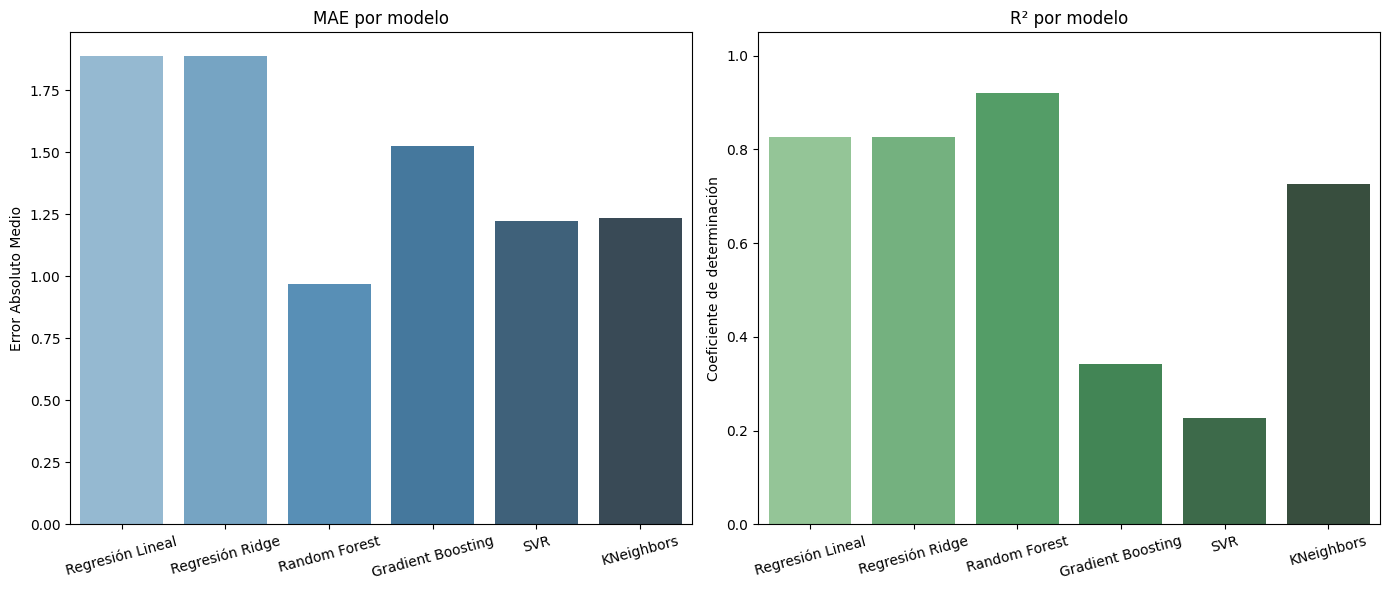

In [69]:
plt.figure(figsize=(14, 6))

# MAE
plt.subplot(1, 2, 1)
sns.barplot(x=list(resultados.keys()), y=[v['MAE'] for v in resultados.values()], palette="Blues_d")
plt.title("MAE por modelo")
plt.ylabel("Error Absoluto Medio")
plt.xticks(rotation=15)

# R²
plt.subplot(1, 2, 2)
sns.barplot(x=list(resultados.keys()), y=[v['R2'] for v in resultados.values()], palette="Greens_d")
plt.title("R² por modelo")
plt.ylabel("Coeficiente de determinación")
plt.ylim(0, 1.05)
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

9. Predicciones vs valores reales

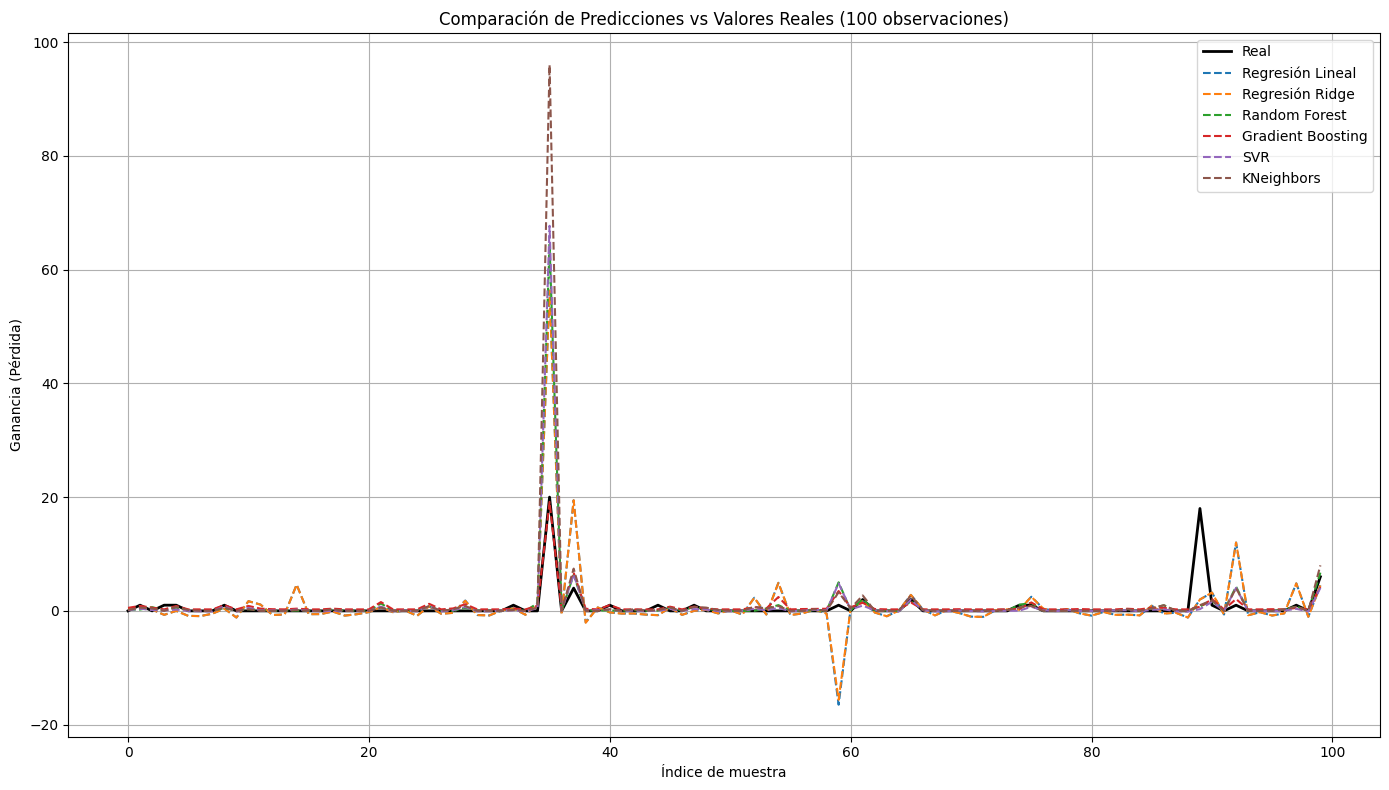

In [70]:
# Crear una figura
plt.figure(figsize=(14, 8))

# Seleccionar una muestra representativa (por ejemplo, 100 observaciones)
muestra = slice(0, 100)
x = range(len(y_test.iloc[muestra]))

# Graficar valores reales
plt.plot(x, y_test.iloc[muestra], label="Real", color='black', linewidth=2)

# Graficar predicciones de cada modelo
for nombre, pred in y_preds.items():
    plt.plot(x, pred[muestra], label=nombre, linestyle='--')

plt.title("Comparación de Predicciones vs Valores Reales (100 observaciones)")
plt.xlabel("Índice de muestra")
plt.ylabel("Ganancia (Pérdida)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

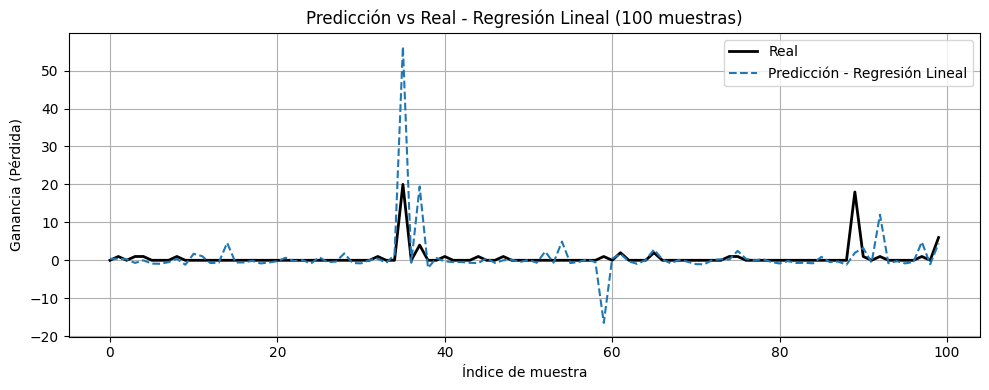

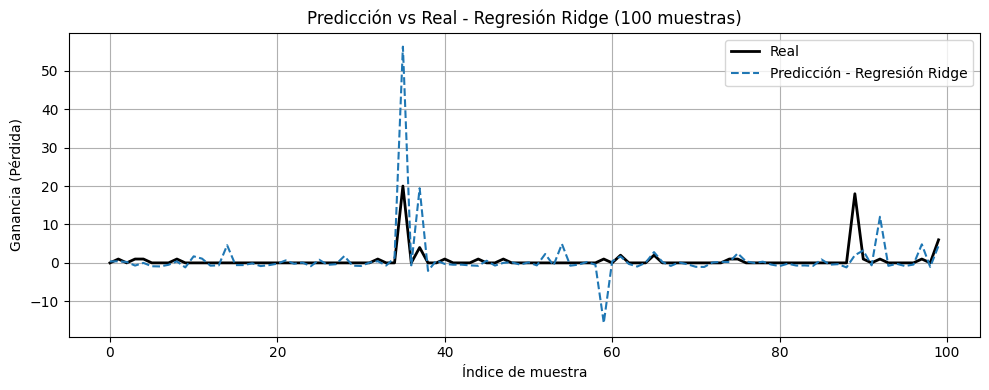

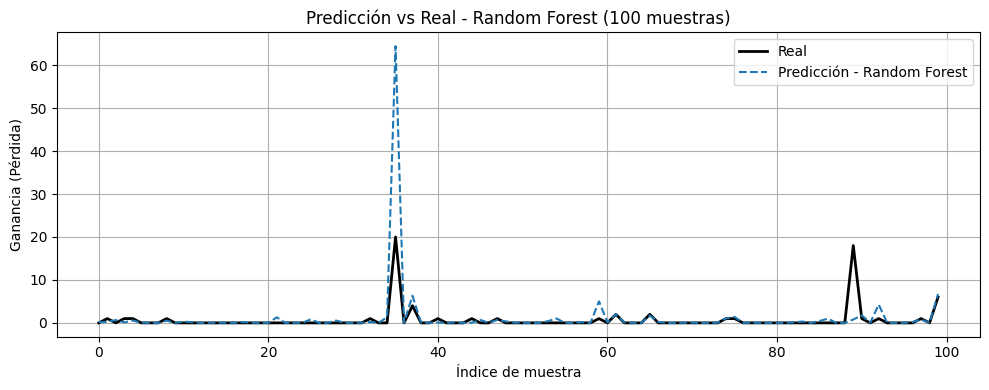

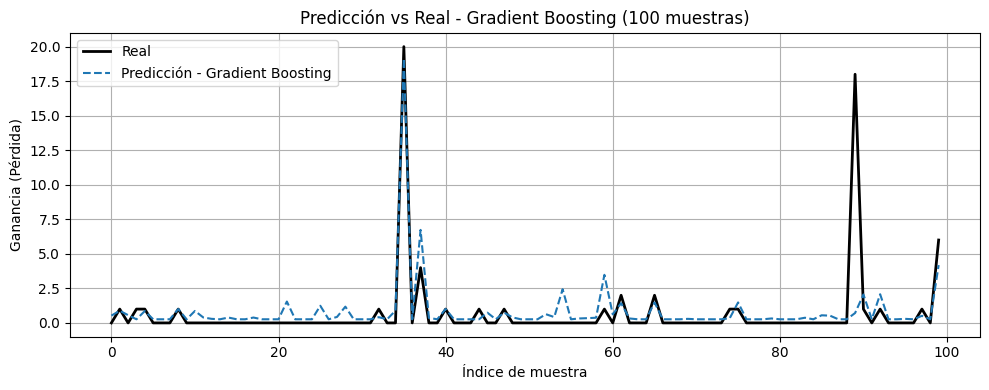

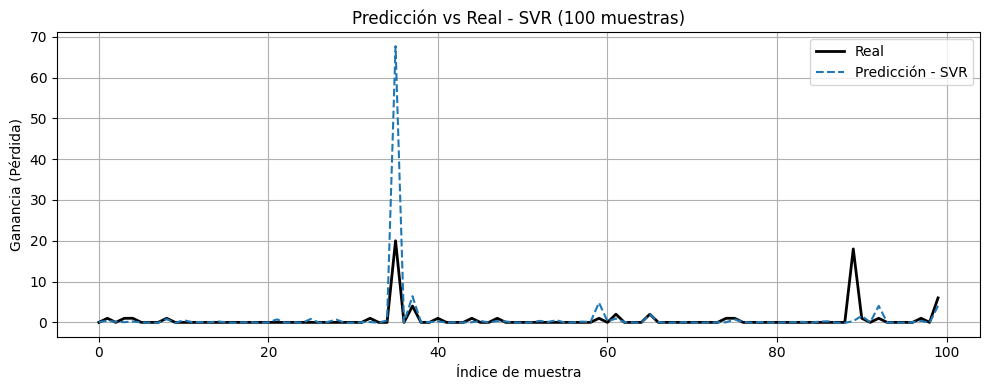

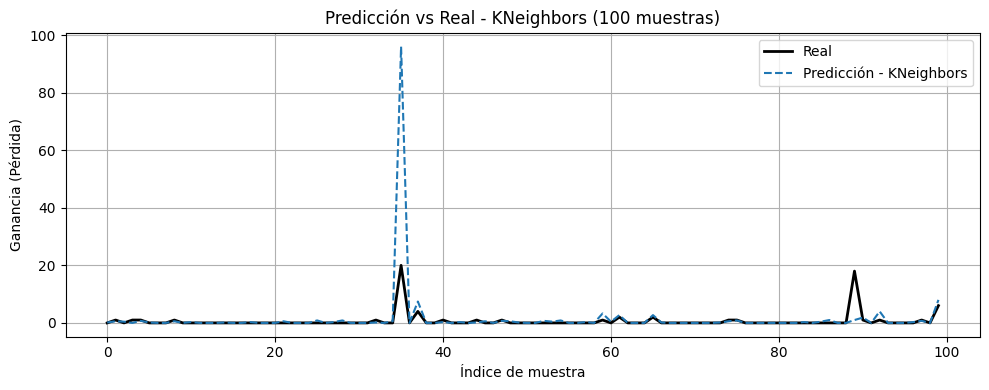

In [71]:
# Tomar una muestra (100 primeros elementos del conjunto de prueba)
muestra = slice(0, 100)
x = range(len(y_test.iloc[muestra]))

# Graficar cada modelo por separado
for nombre, pred in y_preds.items():
    plt.figure(figsize=(10, 4))
    plt.plot(x, y_test.iloc[muestra], label="Real", color='black', linewidth=2)
    plt.plot(x, pred[muestra], label=f"Predicción - {nombre}", linestyle='--')
    plt.title(f"Predicción vs Real - {nombre} (100 muestras)")
    plt.xlabel("Índice de muestra")
    plt.ylabel("Ganancia (Pérdida)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

10. Correlaciones

In [75]:
# Correlaciones directas
corr_activos = df["GANANCIA (PÉRDIDA)"].corr(df["TOTAL ACTIVOS"])
corr_patrimonio = df["GANANCIA (PÉRDIDA)"].corr(df["TOTAL PATRIMONIO"])

# Correlación con región usando promedio de ganancia por región
region_avg = df.groupby("REGIÓN")["GANANCIA (PÉRDIDA)"].mean()
region_map = df["REGIÓN"].map(region_avg)
eta_squared = region_map.corr(df["GANANCIA (PÉRDIDA)"]) ** 2

# Imprimir resultados
print("Correlaciones:")
print(f"Ganancia vs Activos:     {corr_activos:.4f}")
print(f"Ganancia vs Patrimonio:  {corr_patrimonio:.4f}")
print(f"Ganancia vs Región (eta²): {eta_squared:.4f}")


Correlaciones:
Ganancia vs Activos:     0.9135
Ganancia vs Patrimonio:  0.8598
Ganancia vs Región (eta²): 0.0003


11. Matriz de correlación

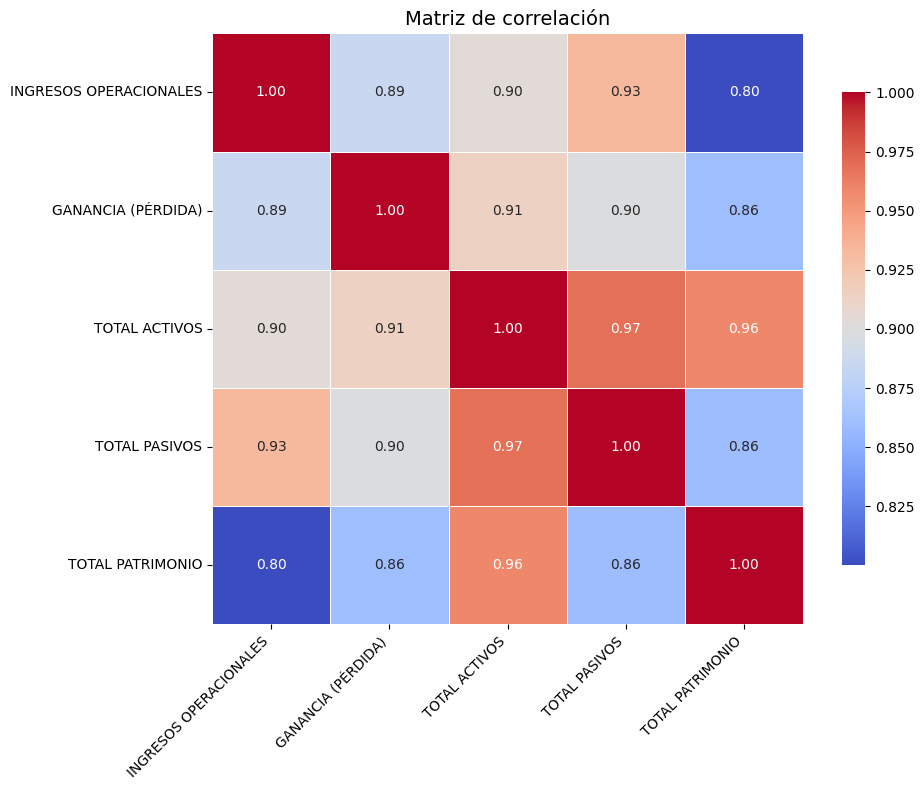

In [77]:
# Excluir columnas que no deben estar en la matriz de correlación
columnas_excluir = ['NIT', 'CIIU', 'Año de Corte']

# Filtrar solo columnas numéricas y excluir columnas no deseadas
numericas = df.select_dtypes(include='number').drop(columns=columnas_excluir, errors='ignore')

# Calcular la matriz de correlación
correlacion = numericas.corr()

# Visualizarla
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacion,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de correlación", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

12. Convertir GANANCIA en variable categórica para mostrar matriz de confusión

In [74]:
df['GANANCIA_CLASE'] = df['GANANCIA (PÉRDIDA)'].apply(lambda x: 'Positiva' if x > 0 else 'Negativa')

